In [8]:
%matplotlib inline
import numpy as np
import pandas as pd
import sys
sys.path.append('../../src')
import global_config
import matplotlib.pyplot as plt
from itertools import product

In [4]:
synthetic_p_results = pd.read_csv('%s/synthetic_push_results.csv' % global_config.EXPERIMENT_SERIALIZATION_DIR)
synthetic_p_results

,Unnamed: 0,L,dist,T,c,pc,cpush,q,improvement
0,0,36,norm-sigma-0.1,100,0.1,0.4,1,10,0.936652
1,1,36,norm-sigma-0.1,100,0.1,0.4,1,100,0.934035
2,2,36,norm-sigma-0.1,100,0.1,0.4,1,5,0.974893
3,3,36,norm-sigma-0.1,100,0.1,0.4,1,50,0.945844
4,4,36,norm-sigma-0.1,100,0.1,0.4,10,10,0.670627
...,...,...,...,...,...,...,...,...,...
134395,134395,36,norm-sigma-0.1,100,0.2,0.2,3,50,0.963228
134396,134396,36,norm-sigma-0.1,100,0.2,0.2,5,10,0.921032
134397,134397,36,norm-sigma-0.1,100,0.2,0.2,5,100,0.956766
134398,134398,36,norm-sigma-0.1,100,0.2,0.2,5,5,0.943371


In [3]:
display(np.unique(synthetic_p_results.cpush))
display(np.unique(synthetic_p_results.q))
display(np.unique(synthetic_p_results.c))
display(np.unique(synthetic_p_results.pc))

array([ 1,  3,  5, 10])

array([  5,  10,  50, 100, 500])

array([0.1, 0.2])

array([0.01, 0.05, 0.1 , 0.2 , 0.3 , 0.4 , 0.5 ])

In [34]:
def filter_push_result_df(dist, T, c, pc, cpush, q):
    return synthetic_p_results[
    (synthetic_p_results['dist']== dist) & 
    (synthetic_p_results['T'] == T) & 
    (synthetic_p_results['c'] == c) & 
    (synthetic_p_results['pc'] == pc) &
    (synthetic_p_results['cpush'] == cpush) &
    (synthetic_p_results['q'] == q)
].sort_values('L')['improvement'].values

def plot_push_for_dist_and_c_pc(dist, c, pc):
    q_for_T = {10: [5], 100: [5,10], 500: [10, 50], 1000: [10, 50]}
    fig, axs = plt.subplots(4, 1, figsize=(10,10))
    fig.suptitle('Correct DK for distribution %s, c=%.1f, pc=%.2f' % (dist, c, pc))
    for i,T in enumerate([10, 100, 500, 1000]):
        x = np.arange(1,51)
        for cpush, q in product([1,5,10], q_for_T[T]):
            axs[i].plot(x, filter_push_result_df(dist, T, c, pc, cpush, q) * 100, label='cpush=%d/%d' % (cpush, q))
            axs[i].plot(x, np.repeat(100, 50), alpha=0.3, linestyle='dashed')
            axs[i].set_title("T=%d %s" % (T, dist))
            axs[i].set_xlabel('L')
            axs[i].set_ylabel('Improvement over baseline [%%]')
        axs[i].legend()

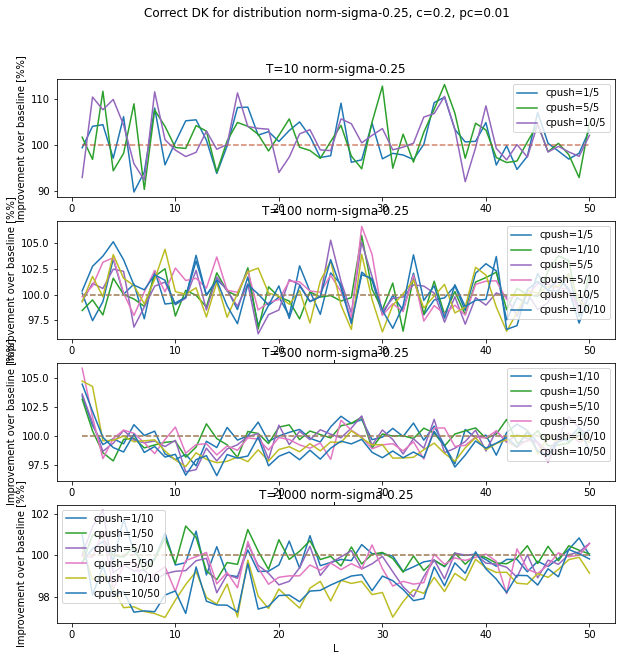

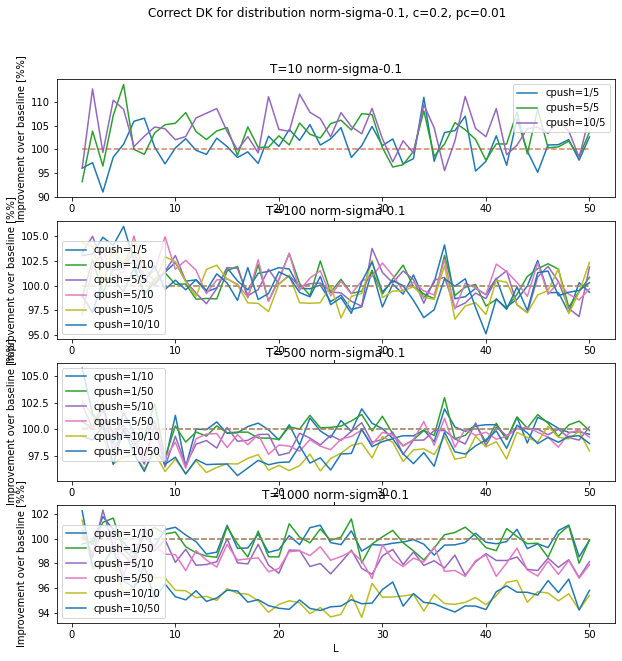

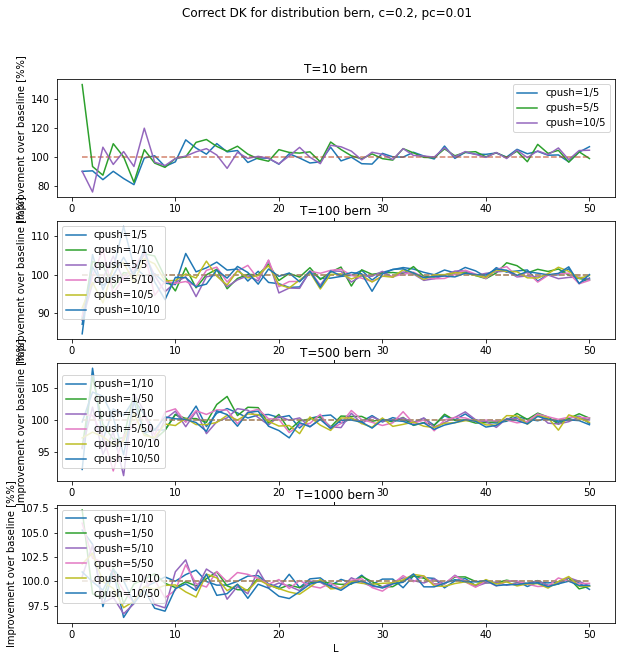

In [35]:
for dist in ['norm-sigma-0.25', 'norm-sigma-0.1', 'bern']:
    plot_push_for_dist_and_c_pc(dist, 0.2, 0.01)

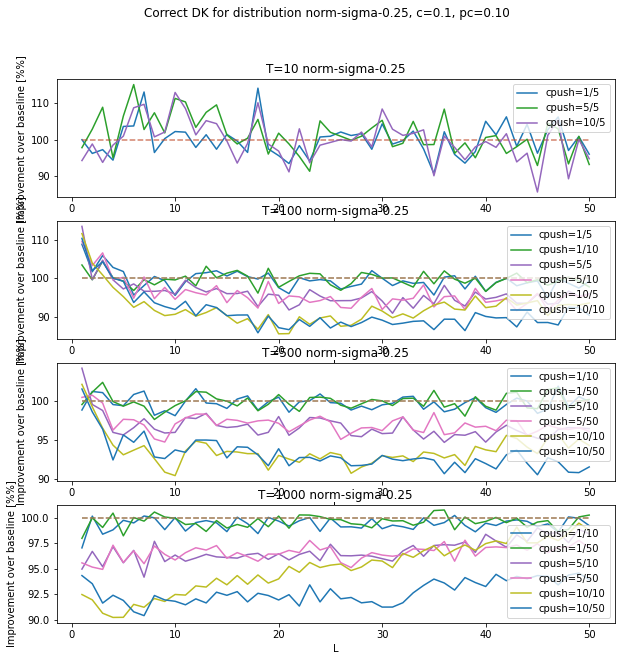

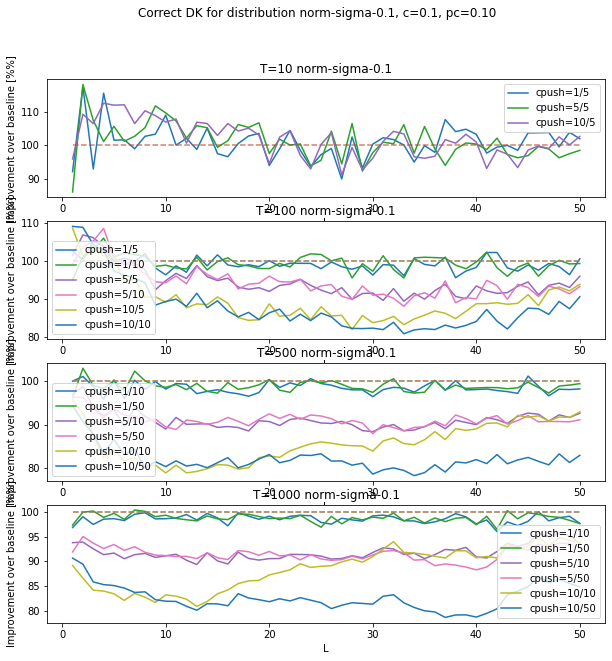

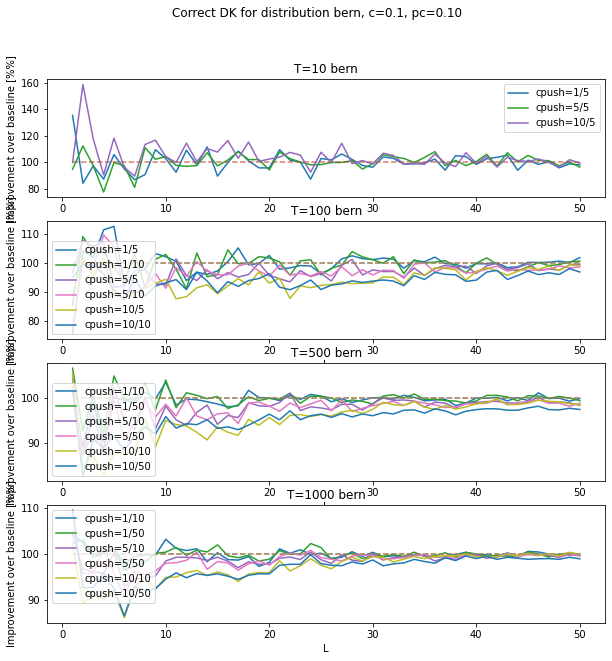

In [36]:
for dist in ['norm-sigma-0.25', 'norm-sigma-0.1', 'bern']:
    plot_push_for_dist_and_c_pc(dist, 0.1, 0.1)

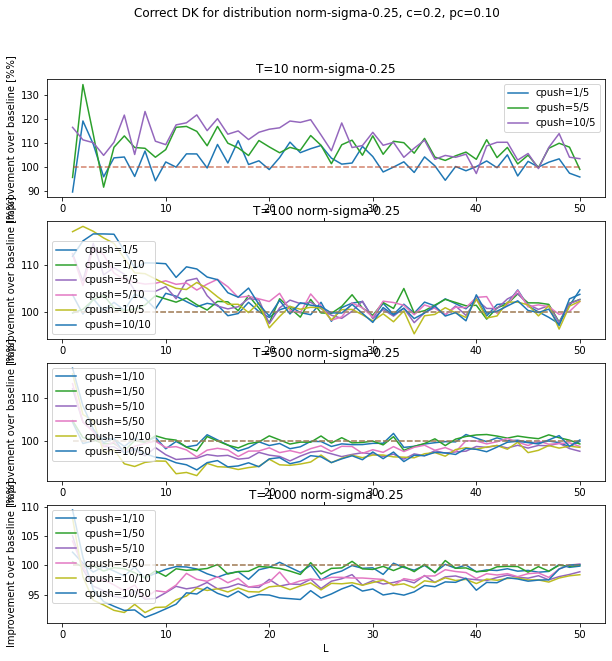

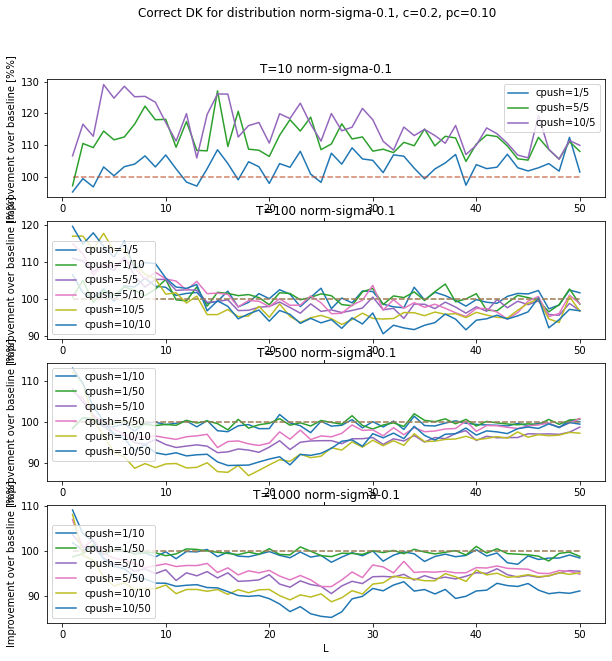

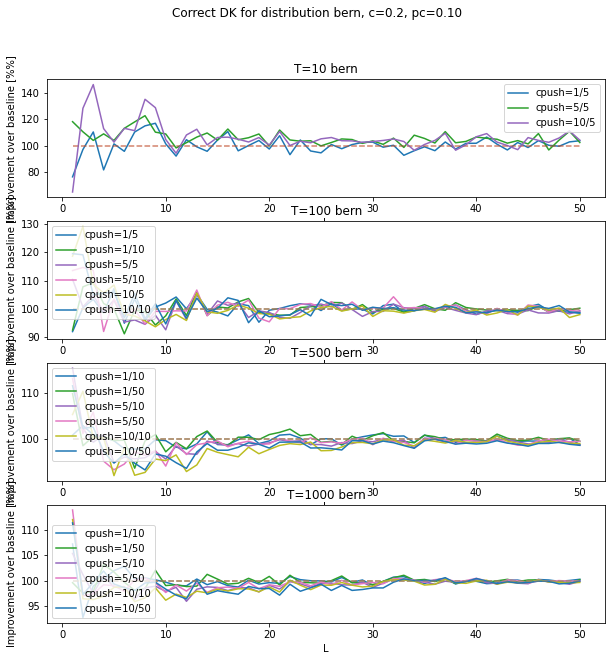

In [37]:
for dist in ['norm-sigma-0.25', 'norm-sigma-0.1', 'bern']:
    plot_push_for_dist_and_c_pc(dist, 0.2, 0.1)

In [26]:
synthetic_g_results = pd.read_csv('%s/synthetic_gk_results.csv' % global_config.EXPERIMENT_SERIALIZATION_DIR)
synthetic_g_results

,Unnamed: 0,L,dist,weight,T,c,type_gk,percentage_affected,improvement
0,0,58,norm-sigma-0.1,0.8,100,0.1,correct,0.00,1.491839
1,1,58,norm-sigma-0.1,0.8,100,0.1,random,0.01,1.470772
2,2,58,norm-sigma-0.1,0.8,100,0.1,remove,0.01,1.501215
3,3,58,norm-sigma-0.1,0.8,100,0.1,random,0.05,1.119625
4,4,58,norm-sigma-0.1,0.8,100,0.1,remove,0.05,1.474889
...,...,...,...,...,...,...,...,...,...
359995,359995,33,norm-sigma-0.25,1.0,1000,0.2,remove,0.50,0.871643
359996,359996,33,norm-sigma-0.25,1.0,1000,0.2,random,0.75,0.273814
359997,359997,33,norm-sigma-0.25,1.0,1000,0.2,remove,0.75,0.938135
359998,359998,33,norm-sigma-0.25,1.0,1000,0.2,random,1.00,0.216861


In [27]:
def filter_result_df(dist, T, weight, type_gk, c):
    return synthetic_g_results[
    (synthetic_g_results['dist']== dist) & 
    (synthetic_g_results['T'] == T) & 
    (synthetic_g_results['weight'] == weight) & 
    (synthetic_g_results['type_gk'] == type_gk) &
    (synthetic_g_results['c'] == c)
].sort_values('L')['improvement'].values

In [28]:
def plot_correct_gk_for_dist_and_different_cs(dist):
    fig, axs = plt.subplots(4, 1, figsize=(10,10))
    fig.suptitle('Correct DK for distribution %s' %dist)
    for i,T in enumerate([10, 100, 500, 1000]):
        x = np.arange(1,101)
        for c in [0, 0.01, 0.05, 0.1, 0.2]:
            axs[i].plot(x, filter_result_df(dist, T, 1.0, 'correct', c) * 100, label='c=%.2f' % c)
            axs[i].plot(x, np.repeat(100, 100), alpha=0.3, linestyle='dashed')
            axs[i].set_title("T=%d %s correct dk" % (T, dist))
            axs[i].set_xlabel('L')
            axs[i].set_ylabel('Improvement over baseline [%%]')
        axs[i].legend()

In [29]:
def plot_correct_gk_for_dist_and_different_weights(dist):
    fig, axs = plt.subplots(4, 1, figsize=(10,10))
    fig.suptitle('Correct DK for distribution %s with different cs and c=0.1' %dist)
    for i,T in enumerate([10, 100, 500, 1000]):
        x = np.arange(1,101)
        for weight in [1.0, 0.8, 0.5, 0.2]:
            axs[i].plot(x, filter_result_df(dist, T, weight, 'correct', 0.1) * 100, label='%.1f-correct-gk' % weight)
            axs[i].plot(x, np.repeat(100, 100), alpha=0.3, linestyle='dashed')
            axs[i].set_title("T=%d %s correct dk" % (T, dist))
            axs[i].set_xlabel('L')
            axs[i].set_ylabel('Improvement over baseline [%%]')
        axs[i].legend()

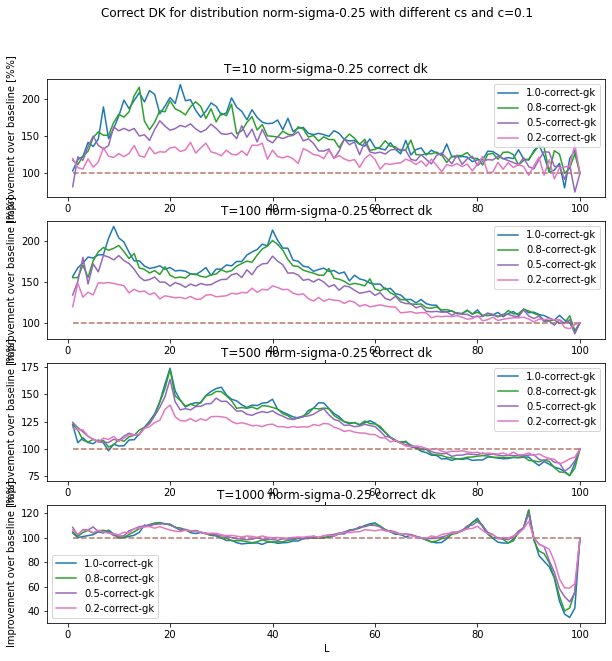

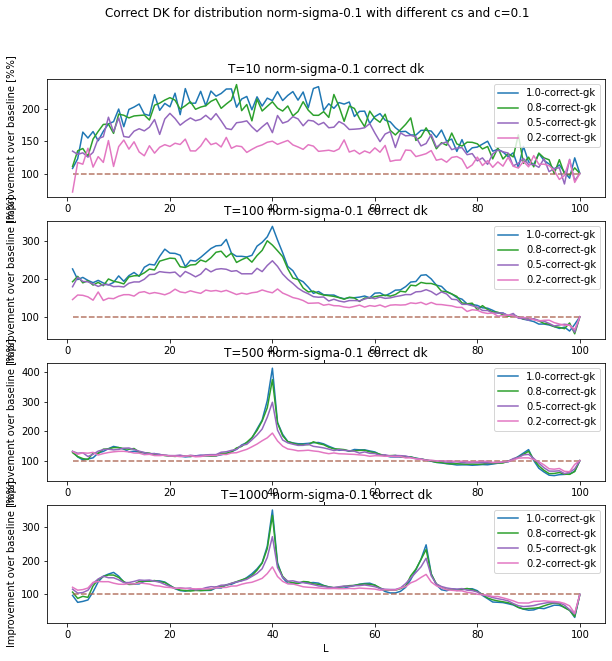

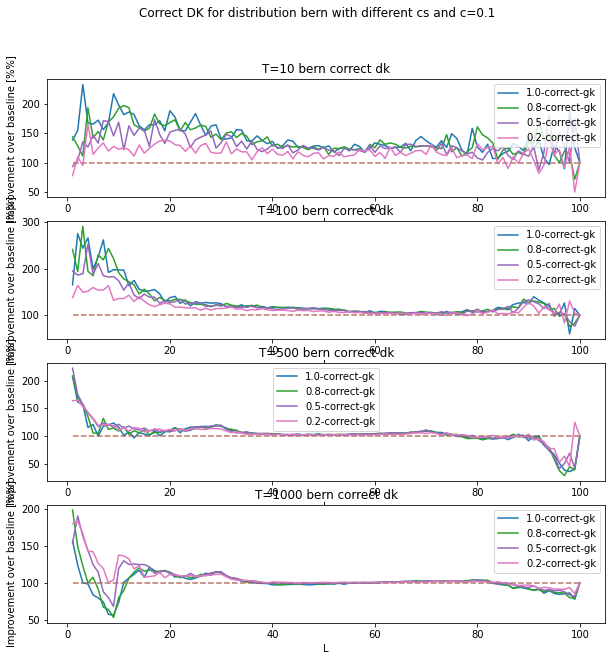

In [30]:
for dist in ['norm-sigma-0.25', 'norm-sigma-0.1', 'bern']:
    plot_correct_gk_for_dist_and_different_weights(dist)

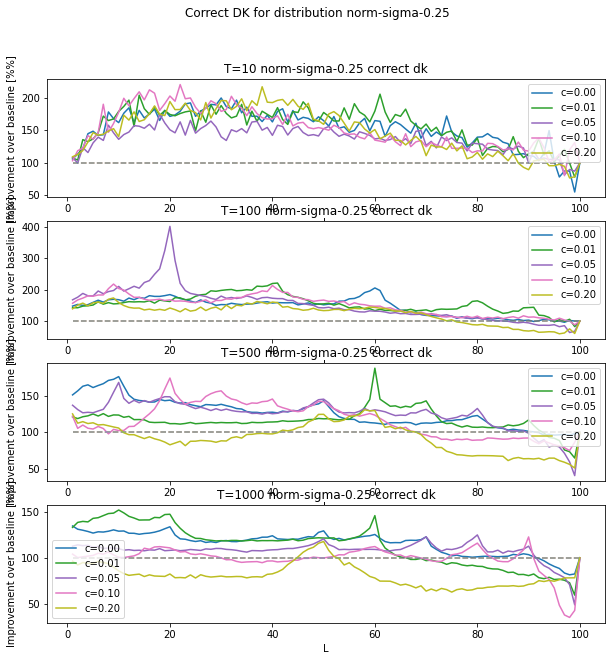

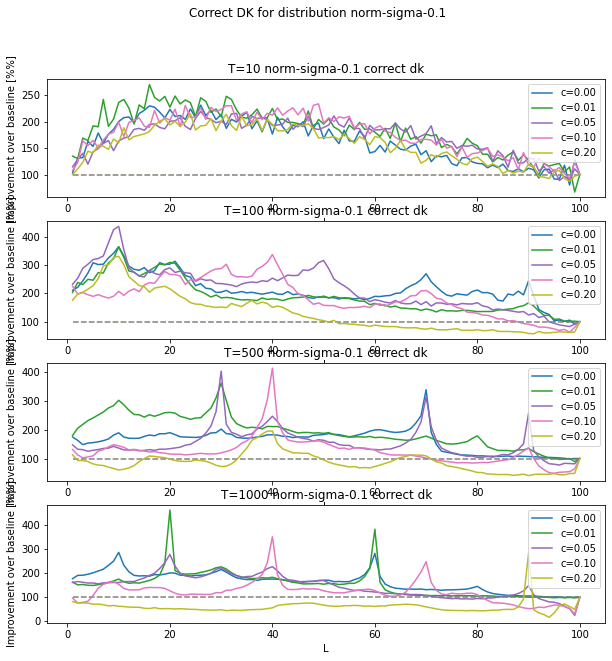

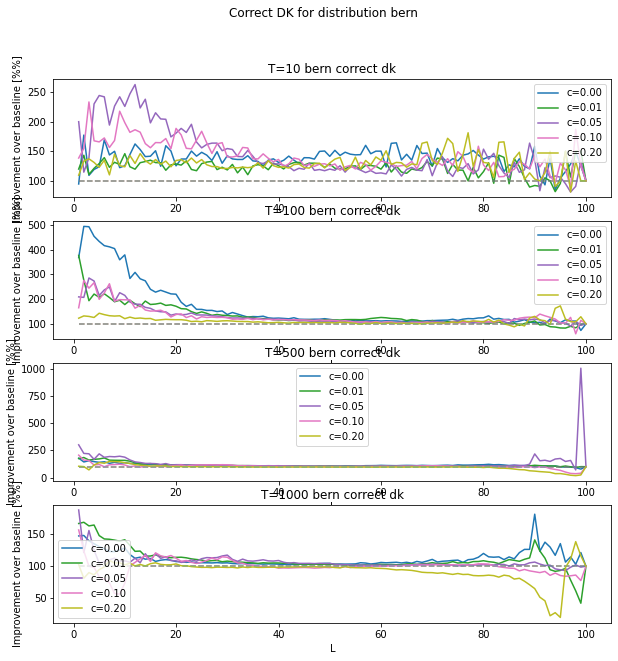

In [31]:
for dist in ['norm-sigma-0.25', 'norm-sigma-0.1', 'bern']:
    plot_correct_gk_for_dist_and_different_cs(dist)

In [32]:
def filter_result_df_by_L_get_percentage_affected(dist, T, weight, type_gk, c, L):
    return synthetic_g_results[
    (synthetic_g_results['dist']== dist) & 
    (synthetic_g_results['T'] == T) & 
    (synthetic_g_results['weight'] == weight) & 
    (synthetic_g_results['type_gk'] == type_gk) &
    (synthetic_g_results['c'] == c) &
    (synthetic_g_results['L'] == L)
].sort_values('percentage_affected')['improvement'].values

def plot_wrong_gk_for_dist_and_different_percentages_of_erros(dist):
    fig, axs = plt.subplots(4, 1, figsize=(10,10))
    n_perc_affected = np.array([0.01,0.05,0.1,0.25,0.5,0.75,1.0]) * 100
    fig.suptitle('Wrong DK for small/ large L and light/ heavy weights for %s' %dist)
    for i,T in enumerate([10, 100, 500, 1000]):
        x = np.arange(1,101)
        for L, weight, kind in product([15, 45], [0.2,0.8], ['random', 'remove']):
            axs[i].plot(n_perc_affected, filter_result_df_by_L_get_percentage_affected(dist, T, weight, kind, 0.1, L) * 100, label='%.1f-w-%s-L=%d' % (weight, kind, L))
            axs[i].plot(x, np.repeat(100, 100), alpha=0.3, linestyle='dashed')
            axs[i].set_title("T=%d %s wrong dk" % (T, dist))
            axs[i].set_xlabel('Affected arms [%%]')
            axs[i].set_ylabel('Improvement over baseline [%%]')
        axs[i].legend()

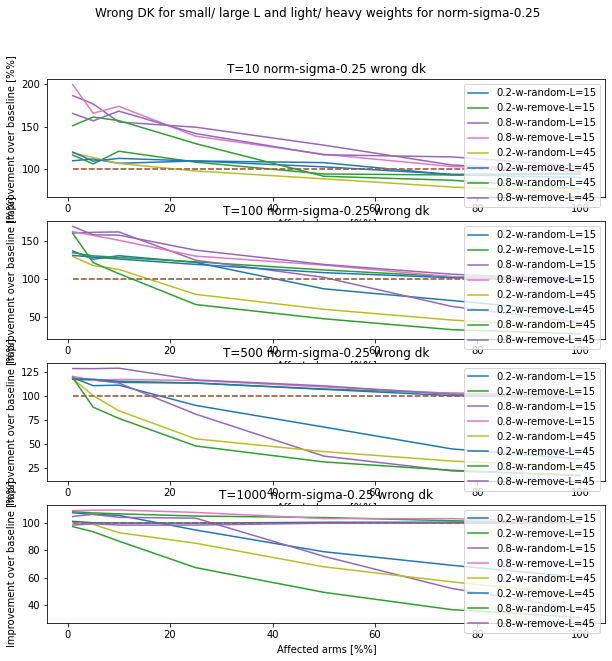

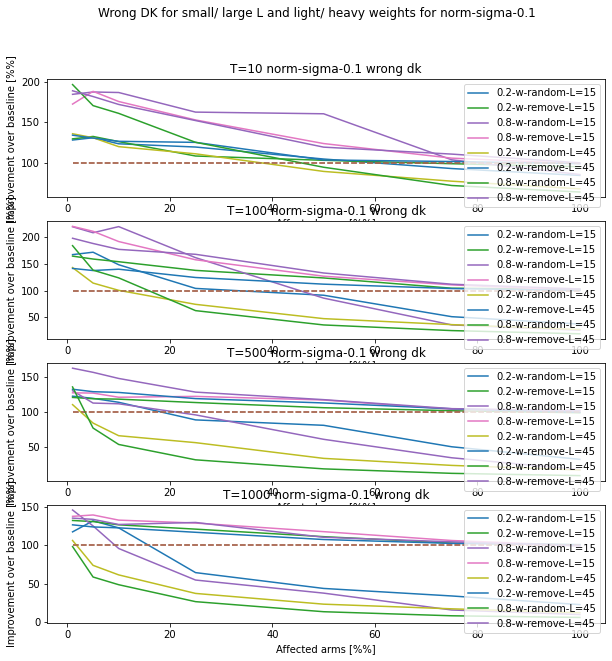

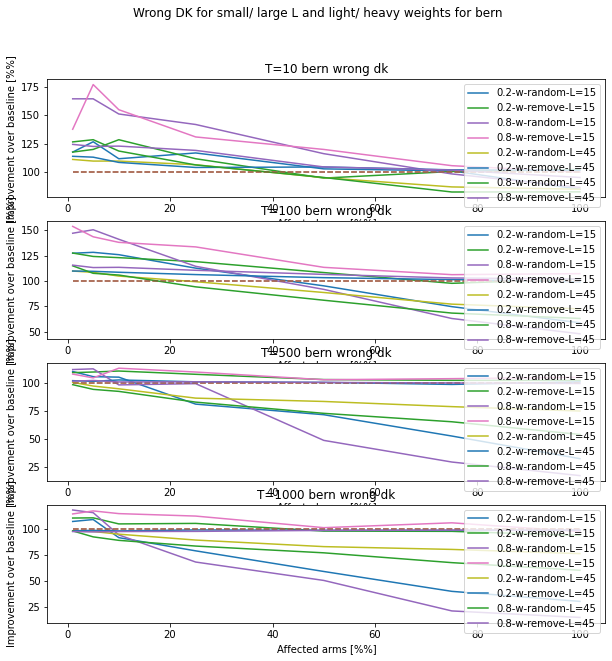

In [33]:
for dist in ['norm-sigma-0.25', 'norm-sigma-0.1', 'bern']:
    plot_wrong_gk_for_dist_and_different_percentages_of_erros(dist)